## N Qudit M Hedef Grover Algoritması

In [1]:
import cirq
from cmath import exp
from math import pi

import numpy as np
from cirq import protocols
from copy import copy

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [2]:
imag = complex(0, 1)
A = 2 * pi * imag / 3
B = 4 * pi * imag / 3

Unitaries = [
    [
        [np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=complex)],
        [np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]], dtype=complex)],
        [np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0], [0, A, 0], [0, 0, B]], dtype=complex)],
        [np.array([[0, 0, B], [1, 0, 0], [0, A, 0]], dtype=complex)],
        [np.array([[0, A, 0], [0, 0, B], [1, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0], [0, B, 0], [0, 0, A]], dtype=complex)],
        [np.array([[0, 0, A], [1, 0, 0], [0, B, 0]], dtype=complex)],
        [np.array([[0, B, 0], [0, 0, A], [1, 0, 0]], dtype=complex)]
    ]
]

In [3]:
class CustomUGate(cirq.Gate):
    def __init__(self, unitary_matrix):
        self.unitary_matrix = unitary_matrix
        super().__init__()

    def _qid_shape_(self):
        return 3,
    
    def _num_qubits_():
        return 1

    def _unitary_(self):
        return self.unitary_matrix

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'U'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [4]:
class QutritIdle(cirq.Gate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        return Unitaries[0][0][0]

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'I'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [5]:
class QutritHadamard(cirq.Gate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        arr = np.array([
            [1, 1, 1],
            [1, exp(A), exp(B)],
            [1, exp(B), exp(A)]
        ], dtype=complex)
        arr *= 1 / pow(3, 0.5)
        return arr

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'H'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [6]:
class QutritHadamardHermitik(cirq.Gate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        return QutritHadamard().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'Ht'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [7]:
class QutritCNOT(cirq.Gate):
    def _qid_shape_(self):
        return 3, 3,
    
    def _num_qubits_(self):
        return 2

    @staticmethod
    def _unitary_():
        arr = np.array([
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1],
            [0, 0, 0, 0, 0, 0, 1, 0, 0]
        ], dtype=complex)
        return arr

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@', 'X'))

    def __str__(self):
        return str(self._unitary_())

In [8]:
class QutritCNOTHermitik(cirq.Gate):
    def _qid_shape_(self):
        return 3, 3,
    
    def _num_qubits_():
        return 2

    @staticmethod
    def _unitary_():
        return QutritCNOT().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@\'', 'X'))

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [9]:
class ControlledQutritPhaseGate(cirq.Gate):
    def __init__(self, root):
        self._root = root
        
    def _qid_shape_(self):
        return 3, 3, 

    def _unitary_(self):
        arr = np.array([
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, exp(A / self._root), 0, 0, 0, 0],
            [0, 0, 0, 0, 0, exp(B / self._root), 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, exp(A / self._root), 0],
            [0, 0, 0, 0, 0, 0, 0, 0, exp(B / self._root)]
        ], dtype=complex)
        return arr

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@', 'Z'))

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [10]:
class QutritPhaseGate(cirq.Gate):
    def __init__(self, root):
        self._root = root
        
    def _qid_shape_(self):
        return 3, 

    def _unitary_(self):
        arr = np.array([
            [1, 0, 0],
            [0, exp(A / self._root), 0],
            [0, 0, exp(B / self._root)]
        ], dtype=complex)
        return arr

    @staticmethod
    def _circuit_diagram_info_(args):
        return "Z"

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())

In [11]:
class MultiContolQutritX(cirq.Gate):
    def __init__(self, qudit_count):
        super(MultiContolQutritX, self)
        self.qudit_count = qudit_count
        
    def _qid_shape_(self):
        return (3, ) * (self.qudit_count)

    def _num_qubits_(self):
        return self.qudit_count

    def _unitary_(self):
        sh = np.power(3, self.qudit_count)
        matrix = np.zeros(shape=(sh, sh), dtype=complex)

        matrix[0][0] = complex(1, 0)
        matrix[1][1] = complex(1, 0)
        matrix[2][2] = complex(1, 0)

        for i in range(3, sh):
            for j in range(3, sh):
                if i == j:
                    if i % 3 == 0:
                        matrix[i][j + 2] = complex(1, 0)
                    elif i % 3 == 1:
                        matrix[i][j - 1] = complex(1, 0)
                    elif i % 3 == 2:
                        matrix[i][j - 1] = complex(1, 0)
                    else:
                        raise("?")
        return matrix

    def _circuit_diagram_info_(self, args):
        to_return = list()
        for i in range(self.num_qubits() - 1):
            to_return.append("@")
        to_return.append("X")
        return to_return

In [12]:
class MultiContolZ(cirq.Gate):
    def __init__(self, qudit_count):
        super(MultiContolZ, self)
        self.qudit_count = qudit_count
        
    def _qid_shape_(self):
        return (3, ) * (self.qudit_count)

    def _num_qubits_(self):
        return self.qudit_count

    def _unitary_(self):
        sh = np.power(3, self.qudit_count)
        matrix = np.zeros(shape=(sh, sh), dtype=complex)

        for i in range(sh):
            for j in range(sh):
                if i == j:
                    matrix[i][j] = complex(1, 0)
        
        matrix[-2:][-2:] = exp(A)
        matrix[-1:][-1:] = exp(B)
        return matrix

    def _circuit_diagram_info_(self, args):
        to_return = list()
        for i in range(self.num_qubits() - 1):
            to_return.append("@")
        to_return.append("Z")
        return to_return

In [13]:
class Oracle(cirq.Gate):
    def __init__(self, matrix, qudit_count):
        super(Oracle, self)
        self.matrix = matrix
        self.qudit_count = qudit_count
        
    def _qid_shape_(self):
        return (3, ) * (self.qudit_count)

    def _num_qubits_(self):
        return self.qudit_count

    def _unitary_(self):
        return self.matrix

    def _circuit_diagram_info_(self, args):
        to_return = list()
        for i in range(self.num_qubits() - 1):
            to_return.append("O")
        to_return.append("O")
        return to_return

In [14]:
def oracle(circuit, targets):
    """ Tüm kutritler üzerinde Oracle oluşturur. """
    
    # Kutrit sayısına göre ID matrix oluşturulur.
    qudit_count = targets[0].__len__()
    sh = np.power(3, qudit_count)
    id_matrix = np.eye(sh)
    
    # Kutritler başlatılır.
    qids = cirq.LineQid.range(qudit_count, dimension=3)
    zero = np.array([[1, 0, 0]], dtype=complex)
    one = np.array([[0, 1, 0]], dtype=complex)
    two = np.array([[0, 0, 1]], dtype=complex)
    
    # Hedeflere göre Oracle şekillenir.
    # np.kron() = Matrisler arasında tensor çarpım
    for target in targets:
        new = np.array([[1]], dtype=complex)
        total_matrix = copy(id_matrix)
        for qid in reversed(target):
            if qid == "0":
                new = np.kron(zero, new)
            elif qid == "1":
                new = np.kron(one, new)
            elif qid == "2":
                new = np.kron(two, new)
            else:
                raise("?")
        
        index = None
        for m in range(new.shape[1]):
            if new[0][m] != complex(0, 0):
                index = m
                break
                
        if index is not None:
            total_matrix[index][index] += -2*new[0][index]
        else:
            raise("?")
        
        # Devreye Oracle eklenir.
        circuit.append(Oracle(copy(total_matrix), qudit_count).on(*qids))

In [15]:
def diffision(circuit, qudit_count):
    """ Tüm kutritler üzerinde diffusion oluşturur. """
    # Hadamard + Oracle + HermitikHadamard 
    
    qids = cirq.LineQid.range(qudit_count, dimension=3)
    circuit.append(QutritHadamardHermitik().on_each(*qids))
    oracle(circuit, ["0"*qudit_count])
    circuit.append(QutritHadamard().on_each(*qids))

In [16]:
def do_grover(shots, search_targets):
    """ Grover Algoritması. """
    
    # Kutritleri oluşturur.
    qudit_count = len(search_targets[0])
    qudits = cirq.LineQid.range(qudit_count, dimension=3)
    circuit = cirq.Circuit()
    
    # Tüm kutritlere Hadamard uygular.
    circuit.append(QutritHadamard().on_each(*qudits))
    
    # Adım sayısı hesaplanır.
    adim_sayisi = int(np.sqrt(len(search_targets[0])))
    
    # Adım sayısı kadar oracle + diffusion.
    for i in range(adim_sayisi):
        oracle(circuit, search_targets)
        diffision(circuit, qudit_count)
    
    # Ölçümler eklenir.
    for i in range(qudit_count):
        circuit.append(cirq.measure(cirq.LineQid(i, dimension=3), key="q{}".format(i)))
    print(circuit)
    
    sim = cirq.Simulator()
    results = sim.run(circuit, repetitions=shots)
    
    # Plotlama yardımcı.
    plots = list()
    helper = str()
    for i in range(shots):
        helper = ""
        for j in range(qudit_count):
            a = results.measurements["q{}".format(j)][i][0]
            helper += "{}".format(a)
        plots.append(copy(helper))
        
    return plots, qudit_count

/tmp/ipykernel_243651/2481888309.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  total_matrix[index][index] += -2*new[0][index]


0 (d=3): ───H───O───O───O───Ht───O───H───O───O───O───Ht───O───H───M('q0')───
                │   │   │        │       │   │   │        │
1 (d=3): ───H───O───O───O───Ht───O───H───O───O───O───Ht───O───H───M('q1')───
                │   │   │        │       │   │   │        │
2 (d=3): ───H───O───O───O───Ht───O───H───O───O───O───Ht───O───H───M('q2')───
                │   │   │        │       │   │   │        │
3 (d=3): ───H───O───O───O───Ht───O───H───O───O───O───Ht───O───H───M('q3')───


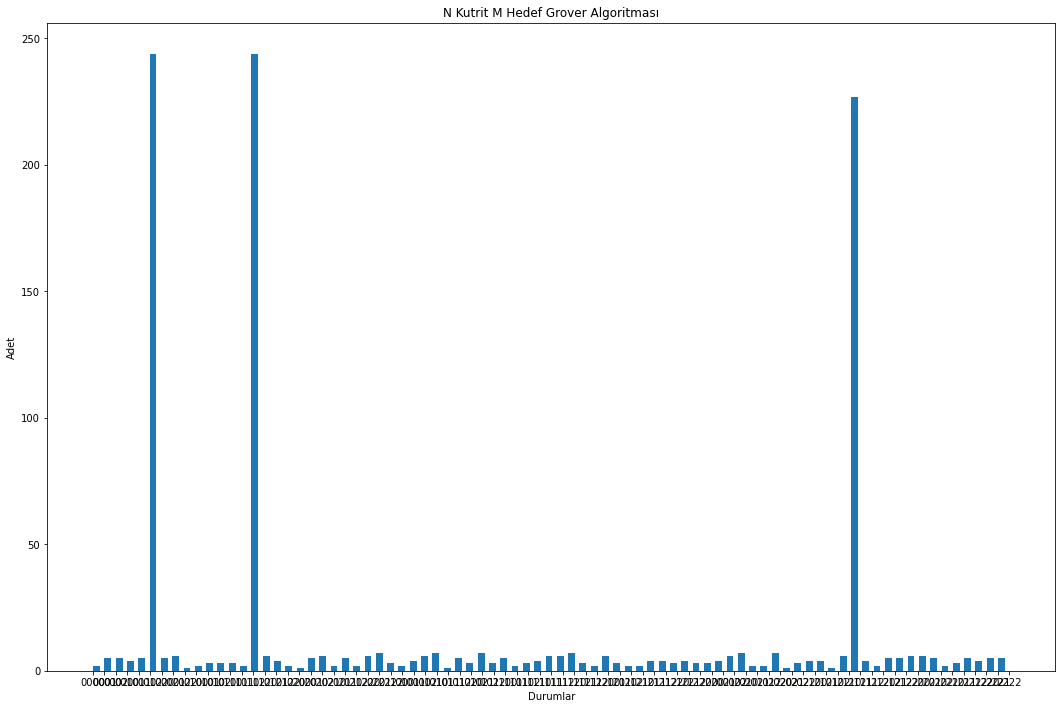

In [19]:
# Aranmak istenen hedefler seçilir. 
# Hedefteki herhangi bir rakamın değeri kuditin boyutuna eşit veya büyük olamaz. 
search_targets = ("0112", "2111", "0012")

plot_data, qudit_count = do_grover(1024, search_targets)
plot_data.sort()

fig = plt.figure(figsize=(14, 9))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(plot_data, np.power(3, qudit_count), width=0.6)
plt.title("N Kutrit M Hedef Grover Algoritması")
plt.xlabel("Durumlar")
plt.ylabel("Adet")
plt.show()